Wine Quality

First of all, the essencial libraries have to be imported. We need pandas so we can manipulate with our dataset, mathplotlib and seaborn are libraries used for graphic
display of data. The tenserflow, keras and train_test_split will be necessary later in neural network training. 

In [1]:
import pandas as pd
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('winequalityN.csv')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Here we are looking for a null values in our dataset. 

In [3]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

We can see only few missing/null values. In this case, we can just drop all samples with null values. If we had more invalid values in our dataset, droping all of them would drastically 
decrease a number of samples and that would lead to incorrect results.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data = data.dropna()

The chart below shows the number of quality of wine for every value. 

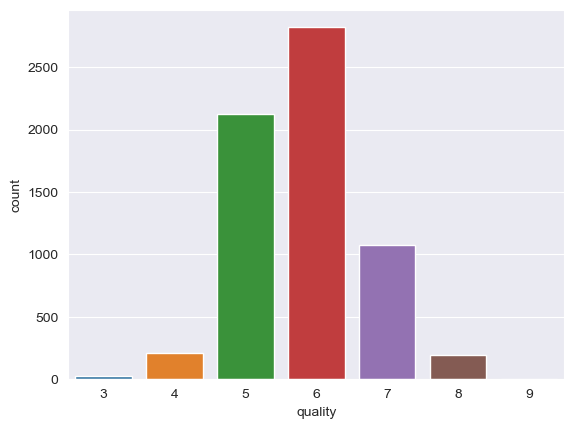

In [6]:
sns.set_style(style="darkgrid")
sns.countplot(x = "quality", data = data)
plt.show()

In [7]:
data.quality.value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

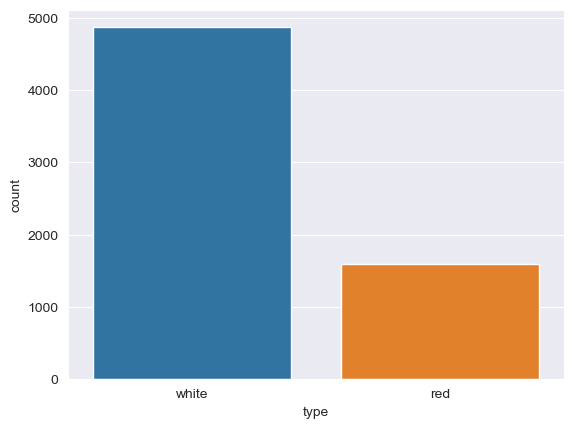

In [8]:
sns.set_style(style="darkgrid")
sns.countplot(x = "type", data = data)
plt.show()

In [9]:
data.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

Now, we are basically done with a visualisation and understanding the data. 

The next step is to adjust our data so we may use them later in model training. 

In [10]:
for i in data.index:
    if data.at[i,'quality'] > 5:
        data.at[i,'quality'] = 1
    else:
        data.at[i,'quality'] = 0

In [11]:
for i in data.index:
    if data.at[i,'type'] == 'white':
        data.at[i,'type'] = 1
    else:
        data.at[i,'type'] = 0

The chart below shows our dataset after adjustments. It shows the quality of wine, where value 0 stands for quality 0-5 and value 1 is quality of 6-10. 
We can see that dataset is not in balance. The ideal proportion would be 50:50.

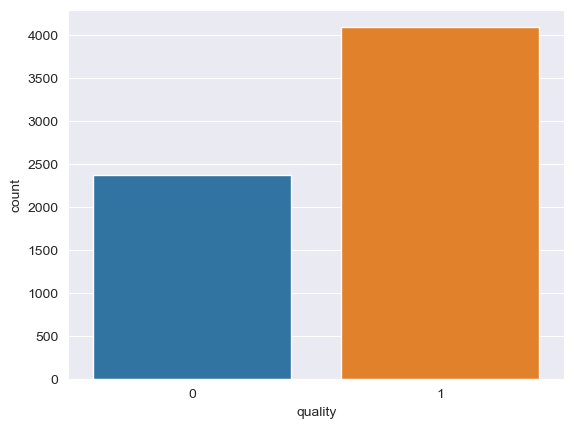

In [12]:
 sns.set_style(style="darkgrid")
sns.countplot(x = "quality", data = data)
plt.show()

In [13]:
data.quality.value_counts()

1    4091
0    2372
Name: quality, dtype: int64

In [14]:
data['type'] = data['type'].astype('int64')

C:\Users\pc\AppData\Local\Temp\ipykernel_10616\4022796603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = data['type'].astype('int64')


Now we must decide which values will be used for training our model. For that, we can do the decision based on correlation between variables.

In [15]:
data.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.488552,-0.653374,0.185892,0.349358,-0.512705,0.472653,0.700521,-0.391437,-0.328474,-0.486715,0.035095,0.117207
fixed acidity,-0.488552,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.067004
volatile acidity,-0.653374,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.268071
citric acid,0.185892,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.075442
residual sugar,0.349358,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.030123
chlorides,-0.512705,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.182352
free sulfur dioxide,0.472653,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.044354
total sulfur dioxide,0.700521,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.047390
density,-0.391437,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.267802
pH,-0.328474,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.017713


Correlation can reach values from -1 to 1. The values closer to -1 and 1 means less impact on final prediction. It is always good to skip these unwanted variables so our model is less loaded and therefore it takes less time to make results.   

In [16]:
y = data['quality']
X = data[['type','fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','pH',
          'sulphates','alcohol']]

Last but not least, we build the prediction model. The meaning of all used functions and even more is available at https://keras.io/api/.

In [18]:
model = Sequential()
model.add(Dense(32, input_dim=9, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])             

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
model.fit(x_train, y_train, epochs=100, batch_size=23)
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
225/225 [==============================] - 0s 557us/step - loss: 0.6638 - accuracy: 0.6072
Epoch 2/100
225/225 [==============================] - 0s 552us/step - loss: 0.6329 - accuracy: 0.6375
Epoch 3/100
225/225 [==============================] - 0s 543us/step - loss: 0.6150 - accuracy: 0.6478
Epoch 4/100
225/225 [==============================] - 0s 552us/step - loss: 0.6016 - accuracy: 0.6609
Epoch 5/100
225/225 [==============================] - 0s 548us/step - loss: 0.5925 - accuracy: 0.6723
Epoch 6/100
225/225 [==============================] - 0s 571us/step - loss: 0.5784 - accuracy: 0.6830
Epoch 7/100
225/225 [==============================] - 0s 539us/step - loss: 0.5730 - accuracy: 0.6917
Epoch 8/100
225/225 [==============================] - 0s 548us/step - loss: 0.5634 - accuracy: 0.7052
Epoch 9/100
225/225 [==============================] - 0s 543us/step - loss: 0.5535 - accuracy: 0.7104
Epoch 10/100
225/225 [==============================] - 0s 543us/step - l

As we can see, the final results won't be more than 77% witch is not ideal. Low accuracy depends on any number of elements. One of them can be the imbalance of our dataset, specially the target variable. 